# Art &The New York Times &The Financial Times & keywords

In [1]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

import blaze
import matplotlib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams['figure.max_open_warning'] = 300

## Data

In [4]:
nyt_data = pd.read_csv('art_nyt_data.csv')

In [5]:
ft_data = pd.read_csv('art_ft_data.csv')

In [6]:
def get_ngrams(sentence):
    result = []
    tokens = nltk.word_tokenize(sentence.lower())
    tokens = [t for t in tokens if t not in string.punctuation]
    for n in range(1, 4):
        result.extend(ngrams(tokens, n))
    result = [' '.join(r) for r in result]
    return result

In [7]:
get_ngrams('Hello, how are you, pre-impresionism?')

['hello',
 'how',
 'are',
 'you',
 'pre-impresionism',
 'hello how',
 'how are',
 'are you',
 'you pre-impresionism',
 'hello how are',
 'how are you',
 'are you pre-impresionism']

In [8]:
def get_ngrams_df(df, sentiment=None): # sentiment = pos, neg
    result = []
    for index, row in df.iterrows():
        if not sentiment:
            result.extend(get_ngrams(row['sentence']))
        if sentiment == 'pos' and row['sentiment'] == 'pos':
            result.extend(get_ngrams(row['sentence']))
        if sentiment == 'neg' and row['sentiment'] == 'neg':
            result.extend(get_ngrams(row['sentence']))
    return result

In [9]:
nytt = get_ngrams_df(nyt_data)

In [10]:
len(nytt)

1260867

In [11]:
nytp = get_ngrams_df(nyt_data, 'pos')

In [12]:
len(nytp)

983391

In [13]:
nytn = get_ngrams_df(nyt_data, 'neg')

In [14]:
len(nytn)

277476

In [15]:
ftt = get_ngrams_df(ft_data)

In [16]:
len(ftt)

318960

In [17]:
ftp = get_ngrams_df(ft_data, 'pos')

In [18]:
len(ftp)

237084

In [19]:
ftn = get_ngrams_df(ft_data, 'neg')

In [20]:
len(ftn)

81876

In [40]:
def all_are_stopwords(ngr):
    tokens = set(nltk.word_tokenize(ngr))
    return tokens.intersection(stopwords.words('english')) == tokens

def top_words(data, n):
    result = []
    fd = nltk.FreqDist(data)
    most_common = fd.most_common()
    count = 0
    for w, f in most_common:
        if not all_are_stopwords(w):
            result.append(w)
            count += 1
        if count >= n:
            break
    return result

def top_words_freq(data, n):
    result = []
    fd = nltk.FreqDist(data)
    most_common = fd.most_common()
    count = 0
    for w, f in most_common:
        if not all_are_stopwords(w):
            result.append((w, f))
            count += 1
        if count >= n:
            break
    return result

In [46]:
nyttt = top_words(nytt, 100)

In [47]:
len(nyttt)

100

In [48]:
fttt = top_words(ftt, 100)

In [49]:
len(fttt)

100

In [50]:
len(set(nyttt).intersection(fttt))

47

## Art

In [16]:
import nltk
from nltk.stem.lancaster import LancasterStemmer

In [17]:
lancaster_stemmer = LancasterStemmer()

def stemmer(word):
    return lancaster_stemmer.stem(word)

In [18]:
def contains_art(sentence):
    tokens = nltk.word_tokenize(sentence)
    stems = map(stemmer, tokens)
    return any(map(lambda x: x == 'art', stems))

In [19]:
sentiment_data.head()

,article_id,date,url,source,title,term_category,original_term,search_term,sentence,sentiment
0,040429008280,20040429,http://search.ft.com/search/article.html?id=04...,ftcom,Google's rivals in search for supremacy,2,microsoft,microsoft,and Microsoft.,pos
1,040429008280,20040429,http://search.ft.com/search/article.html?id=04...,ftcom,Google's rivals in search for supremacy,2,Google,google,"has pulled off a series of acquisitions, inclu...",pos
2,040429008280,20040429,http://search.ft.com/search/article.html?id=04...,ftcom,Google's rivals in search for supremacy,2,Google,google,Earlier this year it dropped the Google search...,pos
3,040429008280,20040429,http://search.ft.com/search/article.html?id=04...,ftcom,Google's rivals in search for supremacy,2,Google,google,Yahoo could now be better placed than Google t...,pos
4,040429008280,20040429,http://search.ft.com/search/article.html?id=04...,ftcom,Google's rivals in search for supremacy,2,Google,google,user spends nearly three hours a month on the ...,pos


In [20]:
%%time
art_data = sentiment_data[sentiment_data.sentence.apply(contains_art) == True]

CPU times: user 10min 48s, sys: 110 ms, total: 10min 48s
Wall time: 10min 48s


In [21]:
len(art_data)

2853

In [22]:
len(sentiment_data)

749162

In [23]:
# Unique number of art sentences
art_data.sentence.value_counts().count()

2211

In [24]:
# % of art sentences: ~ 0.4%
art_data.sentence.value_counts().count() * 100 / sentiment_data.sentence.value_counts().count()

0.38872059762055877

In [25]:
# def split_dataframe(df, n):
#     d = {}
#     length = len(df)
#     chunk_size = math.ceil(length / n)
#     n_max = math.ceil(length / chunk_size)
#     for i in range(min(n, n_max)):
#         d[i] = df[chunk_size * i: chunk_size * (i + 1)]
#     return d

In [26]:
# def analyze_sentiment(df, i):
#     df['sentiment'] = df.sentence.map(lambda x: be.predict([x])[0])
#     df.to_csv('../nytimes/data_{}.csv'.format(i))
#     print('DataFrame saved in data_{}.csv'.format(i))

In [27]:
# N = 8
# data_dict = split_dataframe(data, N)
# # for i in range(N):
# #     analyze_sentiment(data_dict[i], i)
# Parallel(n_jobs=8)(delayed(analyze_sentiment)(data_dict[i], i) for i in range(N))

In [28]:
def diff_month(d1, d2):
    d1 = datetime.strptime(str(d1), '%Y%m%d')
    d2 = datetime.strptime(str(d2), '%Y%m%d')
    return (d2.year - d1.year) * 12 + d2.month - d1.month

# assert diff_month(20100901, 20101001) == 1
# assert diff_month(20091001, 20101001) == 12
# assert diff_month(20091101, 20101001) == 11
# assert diff_month(20090801, 20101001) == 14

In [29]:
art_data['n_month'] = art_data.date.apply(lambda x: diff_month(20030101, x))

/home/antonio/.virtualenvs/nytimes/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
data2 = blaze.Data(art_data)

In [31]:
blaze.by(data2.term_category,
   total_amount=data2.sentiment.count(),
   amount_pos=data2[data2.sentiment == 'pos'].sentiment.count(),
   amount_neg=data2[data2.sentiment == 'neg'].sentiment.count()
)

,term_category,amount_neg,amount_pos,total_amount
0,2,241,620,861
1,3,37,94,131
2,11,396,872,1268
3,12,72,521,593


In [32]:
# Old classifier --> more positive

# blaze.by(data2.term_category,
#    total_amount=data2.sentiment.count(),
#    amount_pos=data2[data2.sentiment == 'pos'].sentiment.count(),
#    amount_neg=data2[data2.sentiment == 'neg'].sentiment.count()
# )

#  	term_category 	amount_neg 	amount_pos 	total_amount
# 0 	2 	106075 	251088 	357163
# 1 	3 	18546 	62625 	81171
# 2 	11 	206396 	200361 	406757
# 3 	12 	9900 	79663 	89563

## Visualizations

In [33]:
grouped_by_category = blaze.by(blaze.merge(data2.term_category, data2.n_month),
    total_amount=data2.sentiment.count(),
    amount_pos=data2[data2.sentiment == 'pos'].sentiment.count(),
    amount_neg=data2[data2.sentiment == 'neg'].sentiment.count(),
)

grouped_by_term = blaze.by(blaze.merge(data2.original_term, data2.n_month),
   total_amount=data2.sentiment.count(),
   amount_pos=data2[data2.sentiment == 'pos'].sentiment.count(),
   amount_neg=data2[data2.sentiment == 'neg'].sentiment.count()
)

In [34]:
grouped_by_category

,term_category,n_month,amount_neg,amount_pos,total_amount
0,2,0,1,4,5
1,2,2,5,2,7
2,2,3,1,2,3
3,2,4,2,3,5
4,2,5,1,1,2
5,2,7,0,2,2
6,2,8,1,2,3
7,2,9,1,1,2
8,2,10,1,2,3
9,2,11,0,3,3


In [35]:
def calc_xlim(start_from, df):
    return (max(datetime.strptime(start_from, "%Y-%m-%d"), df.index[0]), df.index[-1]) if start_from else None

def plot(term_list=None, same=False, info='total', category_list=None, figsize=(16, 8), window_len=20, window='hanning',
         start_from=None):
    if term_list and not same:
        for term in term_list:
            df = blaze.odo(grouped_by_term[grouped_by_term.original_term == term], pd.DataFrame)
            df.set_index('n_month', inplace=True)
            df.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in df.index]
            df['pos_rate'] = df['amount_pos'] / df['total_amount']
            y1_df = df[['total_amount', 'amount_pos', 'amount_neg']]
            y1_df.plot(title=term, figsize=figsize, xlim=calc_xlim(start_from, y1_df))
            y2 = smooth(
                    df['pos_rate'].values,
                    window_len=window_len,
                    window=window
            )
            y2_df = pd.DataFrame(y2, columns=['pos_rate'], index=df.index)
            y2_df.plot(title=term, ylim=[0, 1], color='green', figsize=figsize, xlim=calc_xlim(start_from, y2_df))
    elif term_list and same:
        ax = plt.figure(figsize=figsize).add_subplot(1, 1, 1)
        for term in term_list:
            df = blaze.odo(grouped_by_term[grouped_by_term.original_term == term], pd.DataFrame)
            df.set_index('n_month', inplace=True)
            df.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in df.index]
            df['pos_rate'] = df['amount_pos'] / df['total_amount']
            if info == 'total':
                y = smooth(
                    df['total_amount'].values,
                    window_len=window_len,
                    window=window
                )
                y_df = pd.DataFrame(y, columns=['total_amount'], index=df.index)
                y_df.plot(title='All together', figsize=figsize, ax=ax, xlim=calc_xlim(start_from, y_df))
            else:
                y = smooth(
                    df['pos_rate'].values,
                    window_len=window_len,
                    window=window
                )
                y_df = pd.DataFrame(y, columns=['pos_rate'], index=df.index)
                y_df.plot(title='All together', ylim=[0, 1], figsize=figsize, ax=ax, xlim=calc_xlim(start_from, y_df))
        ax.legend(term_list)
    elif category_list:
        category_dict = {
            11: 'executive/manager',
            12: 'entrepreneur/founder/new venture',
            2: 'big companies',
            3: 'new companies',
        }
        if not same:
            for category in category_list:
                df = blaze.odo(grouped_by_category[grouped_by_category.term_category == category], pd.DataFrame)
                df.set_index('n_month', inplace=True)
                df.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in df.index]
                df['pos_rate'] = df['amount_pos'] / df['total_amount']
                y1_df = df[['total_amount', 'amount_pos', 'amount_neg']]
                y1_df.plot(title=category_dict[category], figsize=figsize, xlim=calc_xlim(start_from, y1_df))
        else:
            ax = plt.figure(figsize=figsize).add_subplot(1, 1, 1)
            for category in category_list:
                df = blaze.odo(grouped_by_category[grouped_by_category.term_category == category], pd.DataFrame)
                df.set_index('n_month', inplace=True)
                df.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in df.index]
                df['pos_rate'] = df['amount_pos'] / df['total_amount']
                y2 = smooth(
                        df['pos_rate'].values,
                        window_len=window_len,
                        window=window
                )
                y2_df = pd.DataFrame(y2, columns=['pos_rate'], index=df.index)
                y2_df.plot(title='All together', ylim=[0, 1], figsize=figsize, ax=ax, xlim=calc_xlim(start_from, y2_df))
            ax.legend(['new companies', 'big companies', 'entrepreneur/founder', 'executive/manager'])

### Categories

## Fig.1 Distribution of sentences by category over the period 1999 to 2014

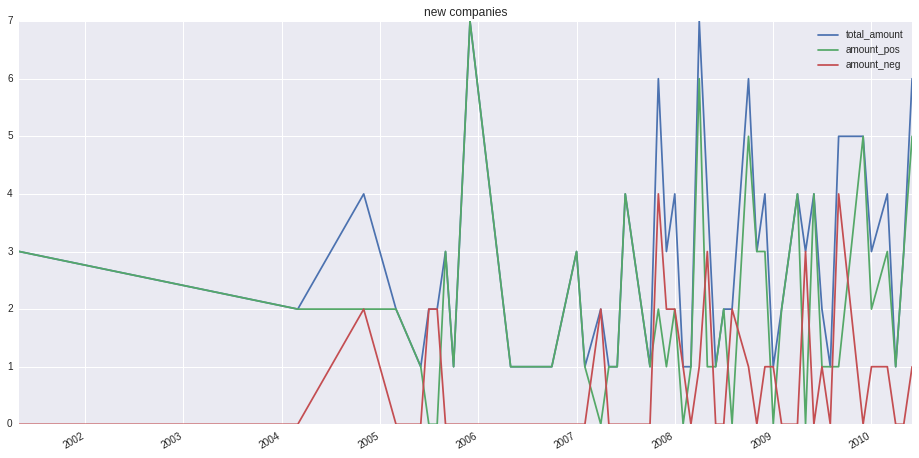

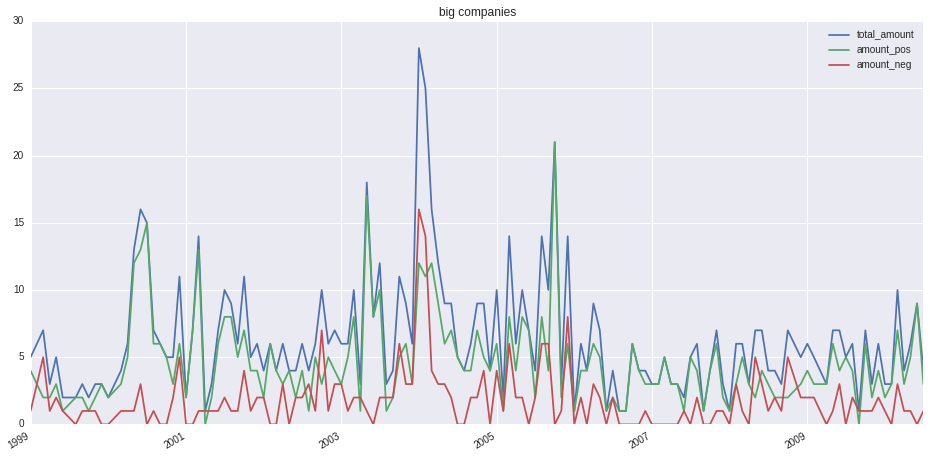

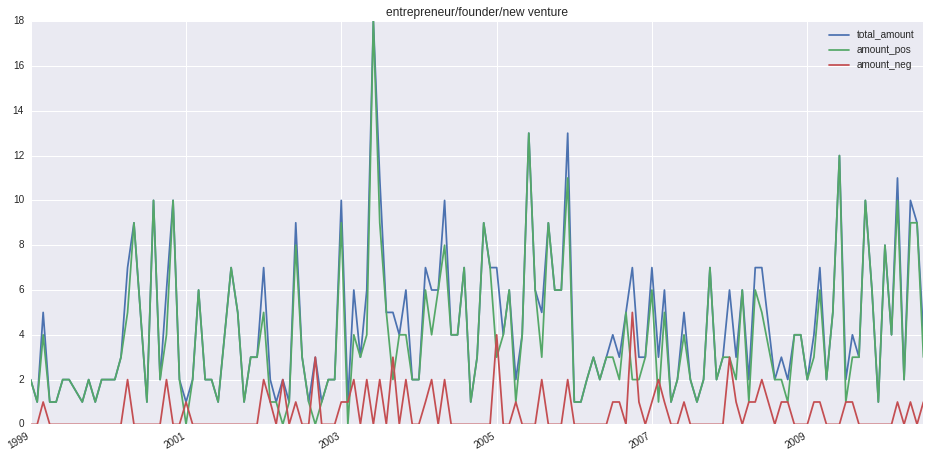

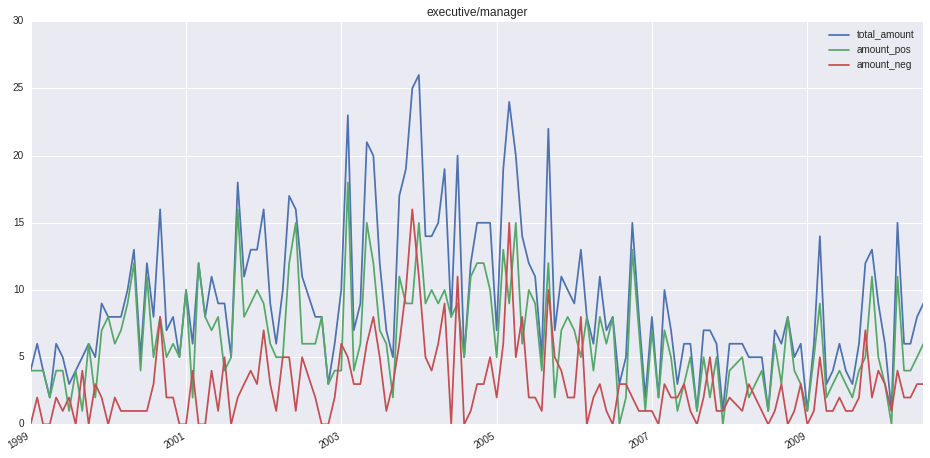

In [36]:
plot(category_list=[3,2, 12,11], info='total', same=False)

## Fig.2 Positive rate of sentences by category over the period 2003 to 2014

/home/antonio/.virtualenvs/nytimes/lib/python3.4/site-packages/ipykernel/__main__.py:58: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


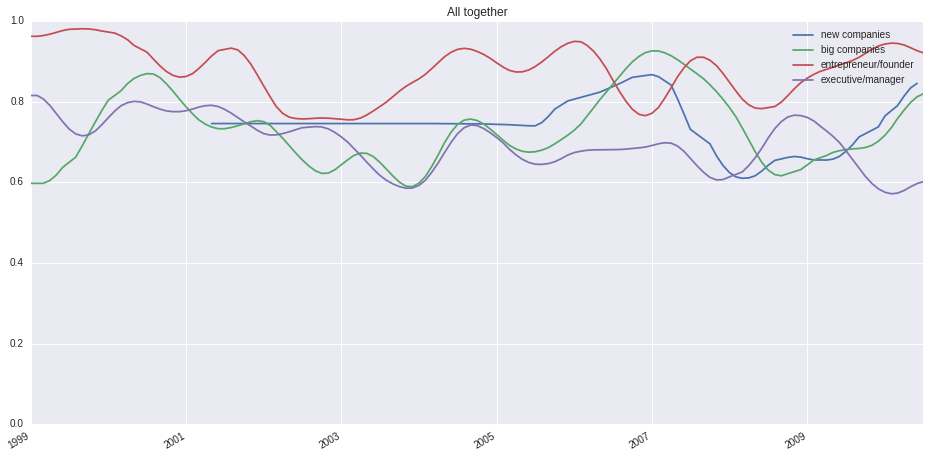

In [37]:
plot(category_list=[3,2, 12,11], info='pos_rate', same=True)

In [38]:
art_data.to_csv('art_ft_data.csv')